In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

C:\Users\maaya\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### Data Loadig & Processing

In [3]:
df = pd.read_csv("data/NCDOT_BikePedCrash.csv")

In [4]:
cols_to_remove = ['OBJECTID', 'X', 'Y', 'BikeAge', 'AmbulanceR', 'BikeAlcDrg', 'BikeDir', 'BikeRace', 'CrashAlcoh', 'CrashDay', 'CrashGrp', 'CrashHour', 'BikeInjury', 'CrashType', 'CrashYear', 'Developmen',
                'DrvrAge', 'DrvrAgeGrp', 'DrvrAlcDrg','DrvrInjury', 'DrvrRace', 'DrvrSex','HitRun', 'NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil', 'NumBicsNoi',
                'NumBicsTot', 'NumBicsUin', 'NumLanes', 'NumUnits', 'RdCharacte', 'RdClass', 'RdConfig', 'RdDefects', 'RdFeature', 'Region', 'TraffCntrl', 'Workzone', 'City', 'County', 'RuralUrban']
# City, County

In [5]:
filter_values = {'BikeAgeGrp': ['Unknown'], 'BikeAlcFlg': ['Missing', 'Unknown'],
                'BikePos': ['Unknown', 'Other'], 'CrashLoc': ['Unknown Location'],
                'CrashSevr': ['Unknown Injury'],
                'DrvrVehTyp': ['Unknown'],
                'DrvrAlcFlg': ['Missing', 'Unknown'],
                'LightCond': ['Unknown', 'Other', 'Dark - Unknown Lighting'], 'RdConditio': ['Unknown', 'Water (Standing, Moving)', 'Sand, Mud, Dirt, Gravel', 'Snow', 'Ice', 'Other'],
                'RdSurface': ['Missing', 'Other', 'Unknown', 'Gravel', 'Soil', 'Sand'],
                'SpeedLimit': ['Unknown'],
                'Weather': ['Other'],
                'BikeSex': ['Unknown']}

In [6]:
replace_values = {
                'RdSurface': {'Grooved Concrete': 'Concrete'},
                'BikePos': {'Multi-use Path': 'Bike Lane / Paved Shoulder',
                            'Driveway / Alley': 'Non-Roadway'},
                'DrvrVehTyp': {
                    "Sport Utility": "Passenger Vehicle",
                    "Light Truck (Mini-Van, Panel)": "Light Truck",
                    "Pickup": "Light Truck",
                    "Passenger Car": "Passenger Vehicle",
                    "Van": "Light Truck",
                    "Taxicab": "Passenger Vehicle",
                    "Motorcycle": "Two-Wheeler",
                    "Moped": "Two-Wheeler",
                    "Tractor/Semi-Trailer": "Heavy Truck",
                    "Truck/Trailer": "Heavy Truck",
                    "Single Unit Truck (2-Axle, 6-Tire)": "Heavy Truck",
                    "Single Unit Truck (3 Or More Axles)": "Heavy Truck",
                    "Unknown Heavy Truck": "Heavy Truck",
                    "Truck/Tractor": "Heavy Truck",
                    "Motor Home/Recreational Vehicle": "Heavy Truck",
                    "EMS Vehicle, Ambulance, Rescue Squad": "Light Truck",
                    "Firetruck": "Heavy Truck",
                    "Police": "Passenger Vehicle",
                    "School Bus": "Heavy Truck",
                    "Other Bus": "Heavy Truck",
                    "Commercial Bus": "Heavy Truck",
                    "Activity Bus": "Heavy Truck"},
                'LightCond': {'Dusk': 'Daylight', 'Dawn': 'Daylight'},
                'Weather': {'Fog, Smog, Smoke': 'Cloudy', 'Snow, Sleet, Hail, Freezing Rain/Drizzle': 'Rain'}
                }

In [7]:
rename_cols_dict = {'BikeAgeGrp': 'age_category', 'BikeAlcFlg': 'is_drunk_biker', 'BikePos': 'biker_location', 'BikeSex': 'gender', 'CrashLoc': 'intersection_type', 'CrashMonth': 'month', 'CrashSevr': 'severity',
                    'DrvrAlcFlg': 'is_drunk_driver', 'DrvrVehTyp': 'vehicle_type', 'Latitude': 'y',  'LightCond': 'light_condition', 'Locality': 'locality', 'Longitude': 'x',
                    'RdConditio': 'road_condition', 'RdSurface': 'road_surface_type', 'SpeedLimit': 'speed_limit', 'Weather': 'weather'}

In [8]:
def pre_process(df, cols_to_remove, filter_values, replace_values, rename_cols_dict):
    df = df.drop(cols_to_remove, axis=1)
    for column, values in filter_values.items():
        df = df[~df[column].isin(values)]

    for col, replace_dict in replace_values.items():
        df[col] = df[col].replace(replace_dict)
    df = df.rename(columns=rename_cols_dict)
    return df

In [9]:
def features_engineer(df):
    df['is_wet'] = df['road_condition'].apply(lambda x: 1 if x == 'Wet' else 0)
    df['is_drunk_biker'] = df['is_drunk_biker'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['is_drunk_driver'] = df['is_drunk_driver'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['is_male'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
    df['age_category'] = df['age_category'].apply(lambda x: int(x.split("-")[0]) if "-" in x else int(x.split("+")[0]))
    df['speed_limit'] = df['speed_limit'].apply(lambda x: int(x.split(" ")[0]))
    severity_dict = {"O: No Injury": 0, "C: Possible Injury": 1, "B: Suspected Minor Injury": 2, "A: Suspected Serious Injury": 3, "K: Killed": 4}
    df['severity'] = df['severity'].replace(severity_dict)
    month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['month'] = df['month'].replace(month_mapping)
    df = df.drop(['road_condition', 'gender'], axis=1)
    category_cols = ['biker_location', 'intersection_type', 'vehicle_type', 'light_condition', 'locality', 'road_surface_type', 'weather']
    df = pd.get_dummies(df, columns=category_cols)
    return df 

In [10]:
df = pre_process(df, cols_to_remove, filter_values, replace_values, rename_cols_dict)
df

,age_category,is_drunk_biker,biker_location,gender,intersection_type,month,severity,is_drunk_driver,vehicle_type,y,light_condition,locality,x,road_condition,road_surface_type,speed_limit,weather
0,11-15,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Passenger Vehicle,36.039490,Daylight,Urban (>70% Developed),-78.883896,Dry,Smooth Asphalt,30 - 35 MPH,Clear
1,20-24,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.751118,Daylight,Urban (>70% Developed),-78.782800,Dry,Smooth Asphalt,30 - 35 MPH,Clear
2,30-39,No,Non-Roadway,Male,Non-Roadway,January,B: Suspected Minor Injury,No,Passenger Vehicle,35.084732,Daylight,Urban (>70% Developed),-80.697820,Dry,Smooth Asphalt,20 - 25 MPH,Cloudy
3,30-39,No,Travel Lane,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.684400,Daylight,Urban (>70% Developed),-80.479320,Dry,Smooth Asphalt,30 - 35 MPH,Cloudy
4,40-49,No,Travel Lane,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Light Truck,34.999428,Daylight,Urban (>70% Developed),-78.904450,Dry,Coarse Asphalt,30 - 35 MPH,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,6-10,No,Travel Lane,Female,Intersection,September,C: Possible Injury,No,Light Truck,35.270257,Daylight,Urban (>70% Developed),-77.585864,Dry,Coarse Asphalt,30 - 35 MPH,Clear
11253,60-69,No,Bike Lane / Paved Shoulder,Female,Intersection,December,A: Suspected Serious Injury,No,Passenger Vehicle,35.534234,Daylight,Urban (>70% Developed),-77.025772,Dry,Coarse Asphalt,30 - 35 MPH,Clear
11255,30-39,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Intersection,December,B: Suspected Minor Injury,No,Passenger Vehicle,35.118065,Daylight,Urban (>70% Developed),-77.077608,Dry,Smooth Asphalt,30 - 35 MPH,Clear
11256,50-59,No,Bike Lane / Paved Shoulder,Male,Non-Intersection,December,O: No Injury,No,Passenger Vehicle,35.718750,Daylight,Urban (>70% Developed),-78.624247,Dry,Coarse Asphalt,30 - 35 MPH,Clear


In [11]:
features_df = features_engineer(df.copy())
features_df

,age_category,is_drunk_biker,month,severity,is_drunk_driver,y,x,speed_limit,is_wet,is_male,...,light_condition_Daylight,locality_Mixed (30% To 70% Developed),locality_Rural (<30% Developed),locality_Urban (>70% Developed),road_surface_type_Coarse Asphalt,road_surface_type_Concrete,road_surface_type_Smooth Asphalt,weather_Clear,weather_Cloudy,weather_Rain
0,11,0,1,2,0,36.039490,-78.883896,30,0,1,...,1,0,0,1,0,0,1,1,0,0
1,20,0,1,1,0,35.751118,-78.782800,30,0,1,...,1,0,0,1,0,0,1,1,0,0
2,30,0,1,2,0,35.084732,-80.697820,20,0,1,...,1,0,0,1,0,0,1,0,1,0
3,30,0,1,1,0,35.684400,-80.479320,30,0,1,...,1,0,0,1,0,0,1,0,1,0
4,40,0,1,2,0,34.999428,-78.904450,30,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,6,0,9,1,0,35.270257,-77.585864,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11253,60,0,12,3,0,35.534234,-77.025772,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11255,30,0,12,2,0,35.118065,-77.077608,30,0,1,...,1,0,0,1,0,0,1,1,0,0
11256,50,0,12,0,0,35.718750,-78.624247,30,0,1,...,1,0,0,1,1,0,0,1,0,0


### EDA

In [26]:
def plot_categorical_distribution(df, column, palette='Set1', stat="count", hue=None):
    # Plot the distribution of the categorical column
    sns.countplot(data=df, x=column, palette=palette, stat=stat, hue=hue)
    plt.title(f'{column} Distribution')
    plt.show()

C:\Users\maaya\AppData\Local\Temp\ipykernel_29164\1478132488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette, stat=stat, hue=hue)


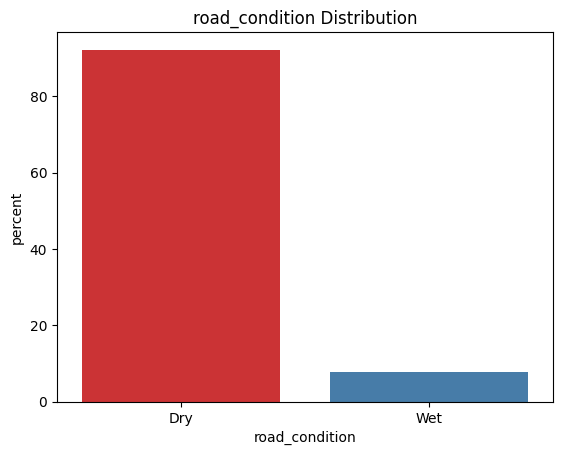

In [27]:
plot_categorical_distribution(df, 'road_condition', stat="percent")

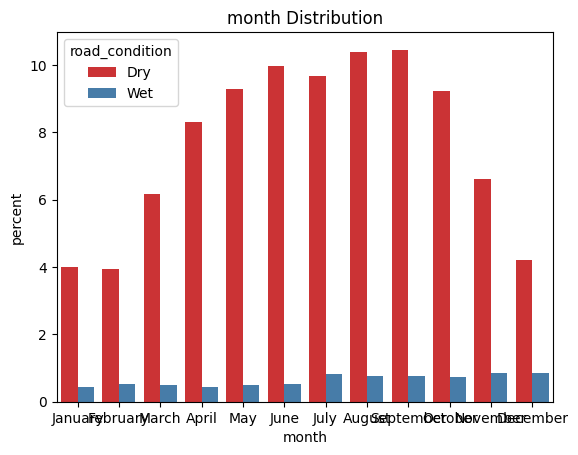

In [28]:
plot_categorical_distribution(df, 'month', stat="percent", hue='road_condition')